In [1]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
from ani2x import *

In [2]:
losses_pre_train = get_losses('fine_tuned', 'pre', 'train')
losses_pre_valid = get_losses('fine_tuned', 'pre', 'valid')

In [3]:
losses_pre_valid.min(axis=1).mean()

2.662237006046177

In [4]:
losses_pre_valid.min()

2.5028666904866

In [8]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w


In [5]:
losses_pre_valid.min(axis=1)

array([2.50286669, 2.72046516, 2.56359873, 2.52569463, 2.88804282,
       2.62361934, 2.80404871, 2.66955997])

In [6]:
for i in range(N_MODELS):
    y = losses_pre_valid[i][100:] / losses_pre_valid[i][100]

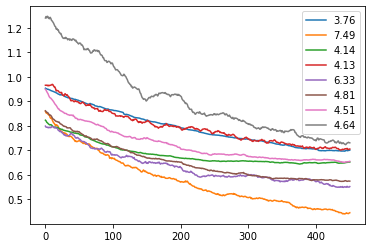

In [9]:
for i in range(N_MODELS):
    # x = losses_rand_valid[i][100:] #/ losses_rand_valid[i][100]
    y = losses_pre_valid[i][:] / losses_pre_valid[i][0]
    # plt.plot(moving_average(x, 5))
    plt.plot(moving_average(y, 50), label = np.round(losses_pre_valid[i][0], 2))
    # plt.yscale('log')
plt.legend()
plt.show()

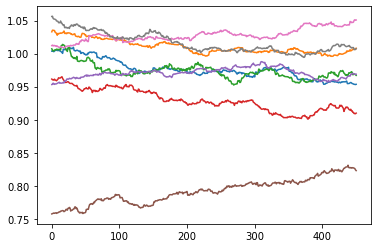

In [36]:
for i in range(N_MODELS):
    x = losses_rand_valid[i][:] / losses_rand_valid[i][100]
    # y = losses_pre_valid[i][100:] #/ losses_pre_valid[i][100]
    plt.plot(moving_average(x, 50))
    # plt.plot(moving_average(y, 5))
    # plt.yscale('log')
plt.show()

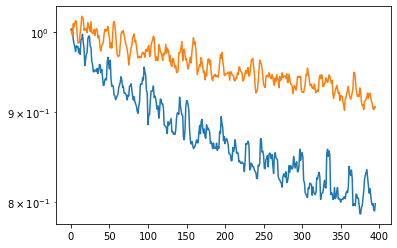

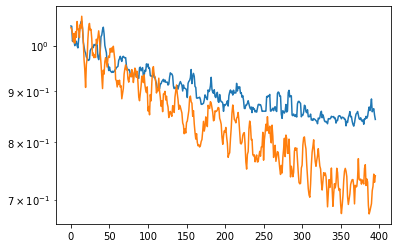

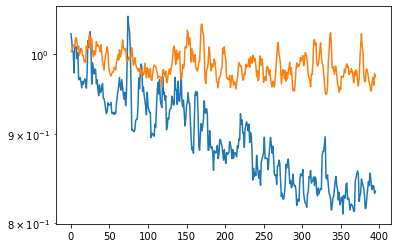

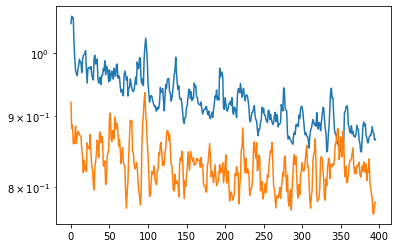

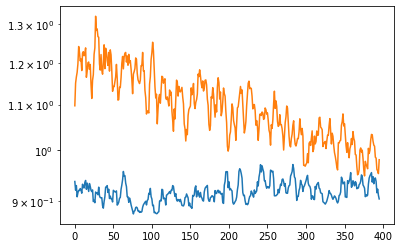

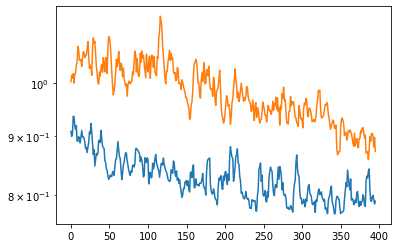

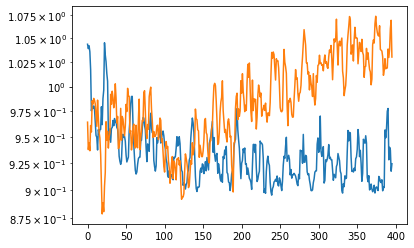

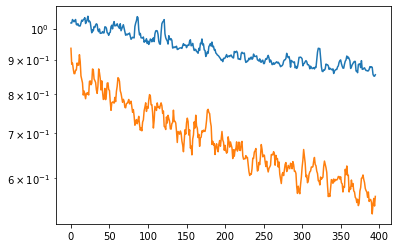

In [42]:
for i in range(N_MODELS):
    x = losses_rand_valid[i][100:] / losses_rand_valid[i][100]
    y = losses_pre_valid[i][100:] / losses_pre_valid[i][100]
    plt.plot(moving_average(x, 5))
    plt.plot(moving_average(y, 5))
    plt.yscale('log')
    plt.show()

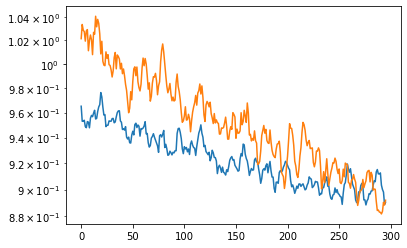

In [51]:
x = losses_rand_valid.mean(axis=0)[200:] / losses_rand_valid.mean(axis=0)[200]
y = losses_pre_valid.mean(axis=0)[200:] / losses_pre_valid.mean(axis=0)[200]
plt.plot(moving_average(x, 5))
plt.plot(moving_average(y, 5))
plt.yscale('log')
plt.show()

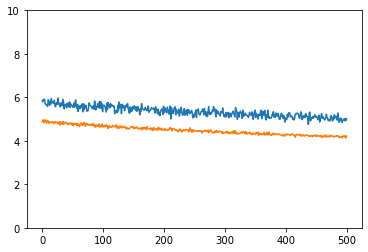

In [4]:
plt.plot(losses_pre_valid.mean(axis=0))
plt.plot(losses_pre_train.mean(axis=0));
plt.ylim(0, 10);

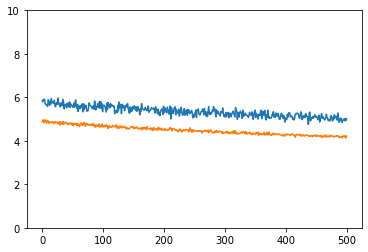

In [11]:
plt.plot(losses_pre_valid.mean(axis=0))
plt.plot(losses_pre_train.mean(axis=0));
plt.ylim(0, 10);

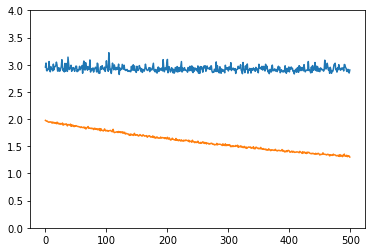

In [5]:
plt.plot(losses_rand_valid.mean(axis=0))
plt.plot(losses_rand_train.mean(axis=0));
plt.ylim(0, 4);

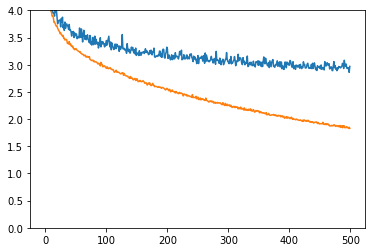

In [16]:
plt.plot(losses_rand_valid.mean(axis=0))
plt.plot(losses_rand_train.mean(axis=0));
plt.ylim(0, 4);

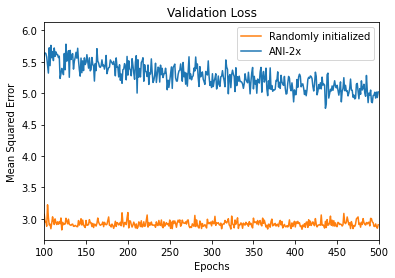

In [6]:
plt.plot(losses_rand_valid.mean(axis=0), label='Randomly initialized', color='C1')
plt.plot(losses_pre_valid.mean(axis=0), label='ANI-2x', color='C0')
# plt.ylim(1.7, 2.2);
plt.xlim(100, 500);
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
# plt.savefig('./validation_curves.png', dpi=300)

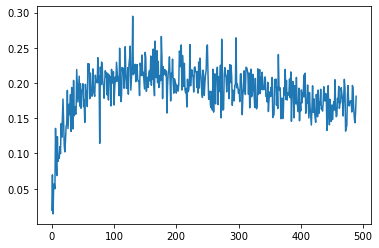

In [212]:
plt.plot(losses_rand_valid.mean(axis=0)[10:] - losses_pre_valid.mean(axis=0)[10:]);

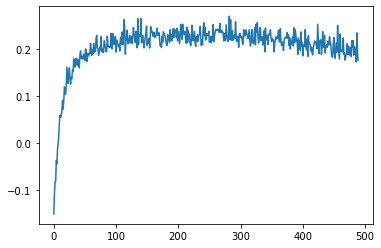

In [277]:
plt.plot(losses_rand_valid.mean(axis=0)[10:] - losses_pre_valid.mean(axis=0)[10:]);

(120.0, 500.0)

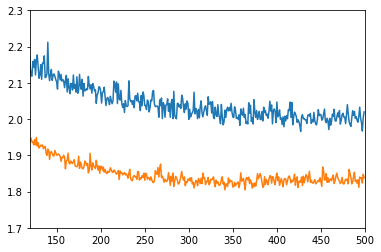

In [213]:
plt.plot(losses_rand_valid.mean(axis=0))
plt.plot(losses_pre_valid.mean(axis=0));
plt.ylim(1.7, 2.3);
plt.xlim(120, 500)

(120.0, 500.0)

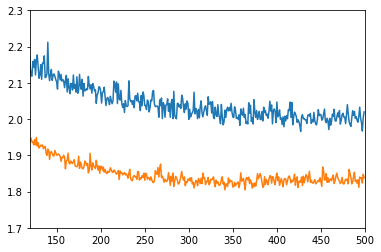

In [240]:
plt.plot(losses_rand_valid.mean(axis=0))
plt.plot(losses_pre_valid.mean(axis=0));
plt.ylim(1.7, 2.3);
plt.xlim(120, 500)

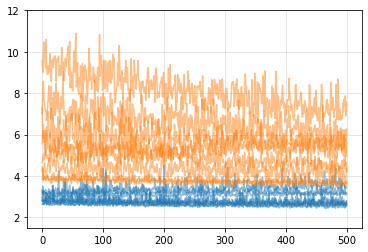

In [17]:
for loss in losses_rand_valid:
    plt.plot(loss, color='C0', alpha=0.5)
for loss in losses_pre_valid:
    plt.plot(loss, color='C1', alpha=0.5)
plt.grid(alpha=0.4)
plt.ylim(1.5, 12);

In [18]:
mins = pd.DataFrame({'ANI-2x': losses_pre_valid.min(axis=1), 'Randomly Initialized': losses_rand_valid.min(axis=1)})
mins = mins.melt(var_name='Model', value_name='Min_Loss')

Text(0.5, 1.0, 'Minimum Validation Loss')

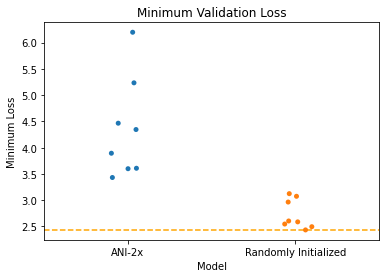

In [19]:
sns.stripplot(data=mins, y='Min_Loss', x='Model')
plt.ylabel('Minimum Loss')
plt.axhline(y=losses_rand_valid.min(), color='orange', linestyle='--')
plt.title('Minimum Validation Loss')
# plt.savefig('./minimum_loss.png', dpi=300)

In [198]:
losses_pre_valid.min(axis=1)

array([1.87753435, 1.72783039, 1.92030294, 1.8076953 , 1.81467951,
       1.9487596 , 1.81960704, 1.86679689])

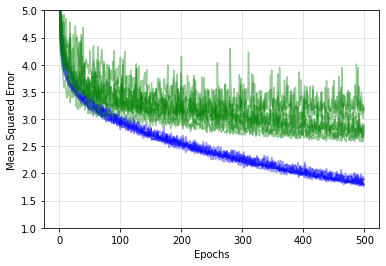

In [62]:
for loss in losses_rand_train:
    plt.plot(loss, color='blue', alpha=0.4)
for loss in losses_rand_valid:
    plt.plot(loss, color='green', alpha=0.4)
plt.grid(alpha=0.4)
plt.ylim(1, 5);
plt.ylabel('Mean Squared Error')
plt.xlabel('Epochs');

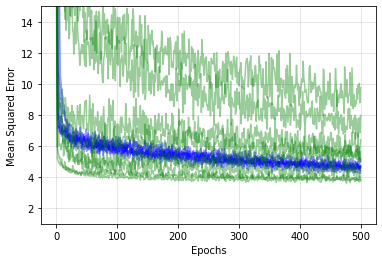

In [63]:
for loss in losses_pre_train:
    plt.plot(loss, color='blue', alpha=0.4)
for loss in losses_pre_valid:
    plt.plot(loss, color='green', alpha=0.4)
plt.grid(alpha=0.4)
plt.ylim(1, 15);
plt.ylabel('Mean Squared Error')
plt.xlabel('Epochs');

In [199]:
losses_pre_valid.min(axis=1).mean() / losses_rand_valid.min(axis=1).mean()

0.9048491250827966

In [200]:
losses_pre_valid.min() / losses_rand_valid.min()

0.910993284319363

In [84]:
np.mean([np.min(loss) for loss in losses_pre_valid]) / np.mean([np.min(loss) for loss in losses_rand_valid])

0.9048491250827966

## Test models

In [10]:
model_pres = [load_best_model(id_=i, kind='pre', name='fine_tuned', progressive=True, eval=True) for i in range(N_MODELS)]
# model_rands = [load_best_model(id_=i, kind='rand',  name='gen_frozen', progressive=False, eval=True) for i in range(N_MODELS)]


In [11]:
data_test = load_pdb_bind_filtered_sub(train=False, test=True)

In [12]:
consts_ani2x = get_consts_ani2x()
aev_computer_ani2x = get_aev_computer(consts_ani2x)

/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/torch/functional.py:1069: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1640812094853/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.cartesian_prod(tensors)  # type: ignore[attr-defined]


In [13]:
n_test = len(data_test)

In [14]:
testloader = get_data_loader(dataset=data_test, batchsize=n_test, shuffle=False)

In [15]:
output_pres = np.array([get_model_output(model_pres[i], aev_computer_ani2x, testloader) for i in range(N_MODELS)])
# output_rands = np.array([get_model_output(model_rands[i], aev_computer_ani2x, testloader) for i in range(N_MODELS)])

In [16]:
output_pres_mean = output_pres.mean(axis=0)
# output_rands_mean = output_rands.mean(axis=0)
labels = get_labels(testloader)

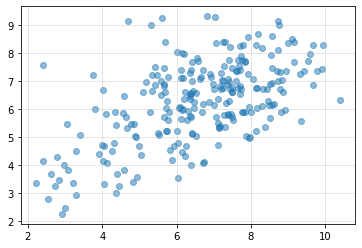

In [17]:
plt.scatter(output_pres_mean, labels, alpha=0.5)
plt.grid(alpha=0.4); 


In [18]:
get_corr(output_pres_mean, labels)

0.5814580793230407

In [19]:
mse(output_pres_mean, labels)

2.1779106454370085

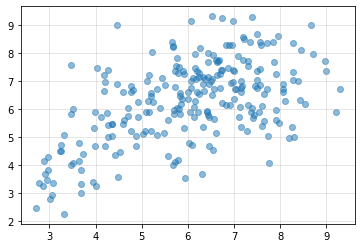

In [ ]:
plt.scatter(output_pres_mean, labels, alpha=0.5)
plt.grid(alpha=0.4); 


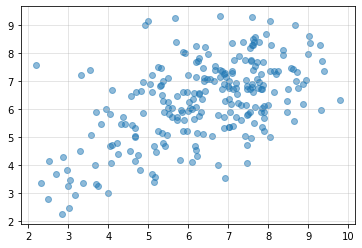

In [164]:
plt.scatter(output_rands_mean, labels, alpha=0.5)
plt.grid(alpha=0.4);

In [175]:
mse(output_pres_mean, labels)

2.05105173379501

In [176]:
mse(output_rands_mean, labels)

2.1450355861806902

In [ ]:
np.corrcoef(output_pres)

(array([ 2.,  0.,  2.,  1.,  6.,  3.,  4.,  5.,  6.,  5.,  8.,  6., 10.,
        10., 13., 19., 15.,  9., 18., 20., 15., 20.,  7., 11.,  6.,  7.,
         9.,  1.,  2.,  5.]),
 array([2.27 , 2.505, 2.74 , 2.975, 3.21 , 3.445, 3.68 , 3.915, 4.15 ,
        4.385, 4.62 , 4.855, 5.09 , 5.325, 5.56 , 5.795, 6.03 , 6.265,
        6.5  , 6.735, 6.97 , 7.205, 7.44 , 7.675, 7.91 , 8.145, 8.38 ,
        8.615, 8.85 , 9.085, 9.32 ]),
 <BarContainer object of 30 artists>)

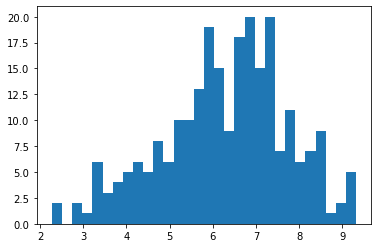

In [184]:
plt.hist(labels, bins=30)

In [181]:
losses_pre_valid.min(axis=1).mean(), losses_rand_valid.min(axis=1).mean()

(4.9148590703285, 2.8053374099973274)

In [182]:
len(labels)

245

In [55]:
tuple(np.triu(np.ones((N_MODELS, N_MODELS), dtype='bool')))

(array([ True,  True,  True,  True,  True,  True,  True,  True]),
 array([False,  True,  True,  True,  True,  True,  True,  True]),
 array([False, False,  True,  True,  True,  True,  True,  True]),
 array([False, False, False,  True,  True,  True,  True,  True]),
 array([False, False, False, False,  True,  True,  True,  True]),
 array([False, False, False, False, False,  True,  True,  True]),
 array([False, False, False, False, False, False,  True,  True]),
 array([False, False, False, False, False, False, False,  True]))

In [69]:
sum(np.triu(np.corrcoef(output_pres)))

array([1.        , 1.82930475, 2.85219683, 3.67633779, 4.73795695,
       5.53300971, 6.12689546, 7.54982951])

In [70]:
sum(np.triu(np.corrcoef(output_rands)))

array([1.        , 1.9442537 , 2.88693205, 3.8502031 , 4.64688212,
       5.5142843 , 6.60299995, 7.38698862])

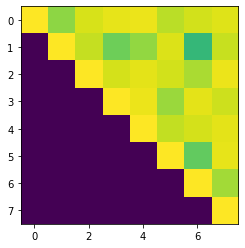

In [64]:
plt.imshow(np.triu(np.corrcoef(output_pres)))

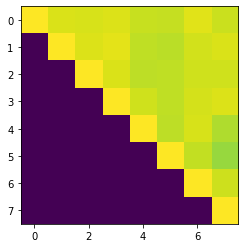

In [65]:
plt.imshow(np.triu(np.corrcoef(output_rands)))

In [187]:
get_corr(output_rands_mean, labels)

0.5489124700852013

In [188]:
get_corr(output_pres_mean, labels)

0.5504406923089881

In [188]:
get_corr(output_pres_mean, labels) - get_corr(output_rands_mean, labels)

0.0005596283545730163

In [ ]:
get_corr(output_pres_mean, labels) - np.mean([get_corr(output_pres[i], labels) for i in range(N_MODELS)]), get_corr(output_rands_mean, labels) - np.mean([get_corr(output_rands[i], labels) for i in range(N_MODELS)])

(0.015116395969985708, 0.006955469088782529)

In [115]:
df_gen = load_df_gen()

In [194]:
diff = pd.Series(np.square(output_pres_mean - labels) - np.square(output_rands_mean - labels), 
    index=[df_gen[df_gen.ID == entry['ID']].index[0] for entry in data_casf])

In [195]:
diff.nlargest(10)

1SQA    3.809283
2WBG    3.662179
4DLD    2.989345
2YKI    2.810094
4QAC    2.795628
3BV9    2.769524
2XB8    2.294569
2FVD    1.901849
3IVG    1.796384
1SYI    1.766953
dtype: float64

In [196]:
df_gen[df_gen.index.isin(set(diff.nlargest(10).index))]

,Resolution,Release_Year,pK,Binding_Type,Binding_Symbol,Ligand,Refined,R_factor,R_free,delta_R,ID,CASF_2016
PDB_ID,,,,,,,,,,,,
3IVG,1.95,2009,4.30,Kd,=,FG5,True,0.175,0.221,0.046,2771,True
2WBG,1.85,2009,4.45,Ki,=,LGS,True,0.156,0.199,0.043,3144,True
3BV9,1.80,2008,5.36,Ki,=,6-mer,True,0.190,0.239,0.049,5924,True
1SYI,2.10,2005,5.44,Ki,=,CPW,True,0.206,0.254,0.048,6204,True
4DLD,2.00,2012,5.82,Ki,=,TZG,True,0.189,0.246,0.057,7463,True
2XB8,2.40,2010,7.59,Ki,=,XNW,True,0.160,0.206,0.046,14171,True
2FVD,1.85,2006,8.52,Ki,=,LIA,True,0.207,0.235,0.028,17195,True
1SQA,2.00,2004,9.21,Ki,=,UI1,True,0.210,0.266,0.056,18440,True
4QAC,2.10,2014,9.40,Kd,=,KK3,True,0.202,0.247,0.045,18659,True


In [126]:
df_bind = load_pdb_bind_filtered()

NameError: name 'data' is not defined

In [124]:
df_gen = get_df_gen()


In [ ]:
save_df_gen()